In [1]:
import pandas as pd
import datetime
import yfinance as yf
import numpy as np

## Все выполняется для векторов return

In [2]:
hist = yf.download('AAPL')
hist.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


In [3]:
hist["Returns"] = hist["Adj Close"].pct_change()
hist = hist.dropna()

In [4]:
hist.head(5)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,-0.052171
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,-0.073398
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.024751
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.028992
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097720,48630400,0.061029


# Задание 2. Посчитать среднеквадратичное отклонение, среднее для какого-то стока

In [5]:
returns = hist['Returns']

mean_return = np.mean(returns)
std_deviation = np.std(returns)

print("Mean (Average) Return:", mean_return)
print("Standard Deviation:", std_deviation)

Mean (Average) Return: 0.0010916281203700033
Standard Deviation: 0.028073676772210808


# Задание 3.
Посчитать моду и медиану для какого-то стока

In [6]:
from statistics import mode

In [7]:
try:
    mode_return = mode(returns)
except:
    mode_return = "No unique mode found (multiple values with the same highest frequency)."

median_return = np.median(returns)

print("Mode Return:", mode_return)
print("Median Return:", median_return)

Mode Return: 0.0
Median Return: 0.0


# Задание 4.
Для какого-то стока построить гистограмму распределения return. Отнормировать её и построить на том же графике гауссову функцию (нормальное распределение(0,1)). Похоже ли распределение return на стандартное нормальное?

In [8]:
import matplotlib.pyplot as plt

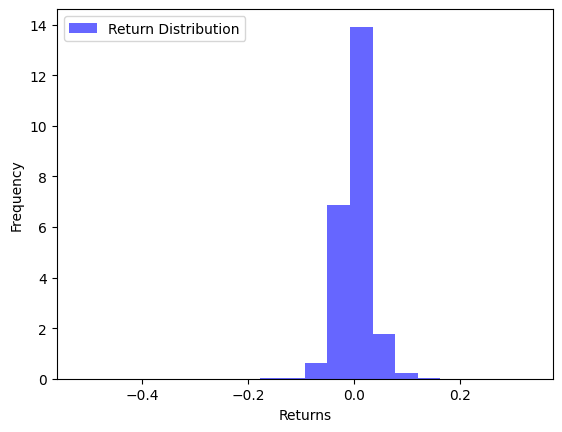

In [9]:
plt.hist(returns, bins=20, density=True, alpha=0.6, color='b', label='Return Distribution')

plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()

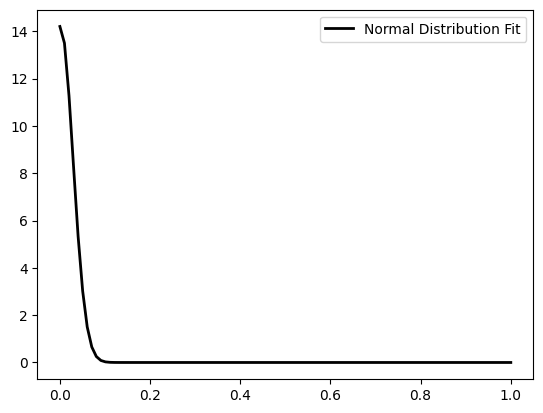

In [10]:
from scipy.stats import norm


mu, std = norm.fit(returns)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')


plt.legend()
plt.show()

In [11]:
monthly_returns = hist['Returns'].resample('M').mean()

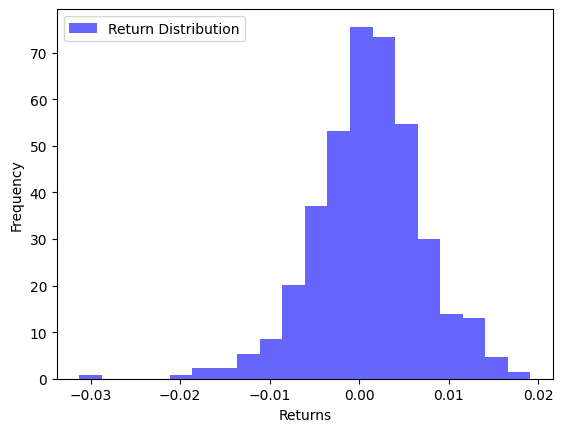

In [12]:
plt.hist(monthly_returns, bins=20, density=True, alpha=0.6, color='b', label='Return Distribution')

plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()

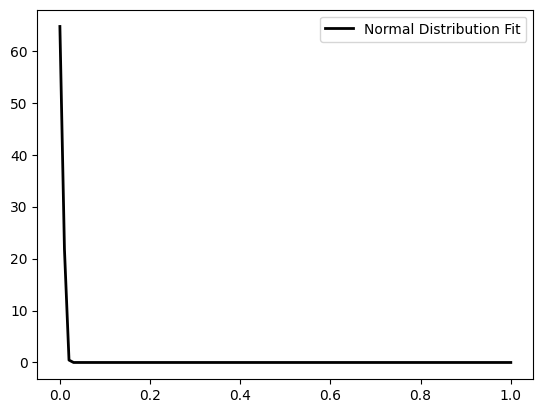

In [13]:
mu, std = norm.fit(monthly_returns)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')


plt.legend()
plt.show()

In [14]:
yearly_returns = hist['Returns'].resample('Y').mean()

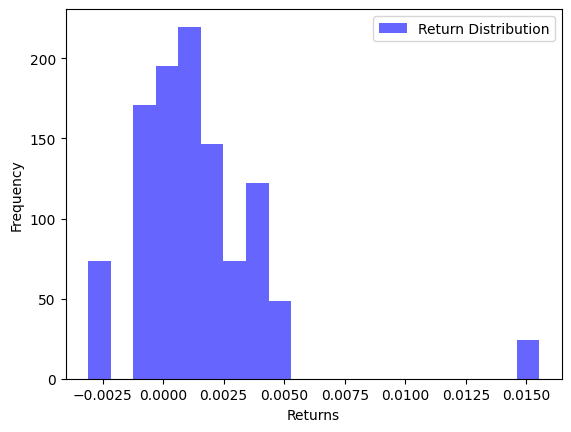

In [15]:
plt.hist(yearly_returns, bins=20, density=True, alpha=0.6, color='b', label='Return Distribution')

plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()

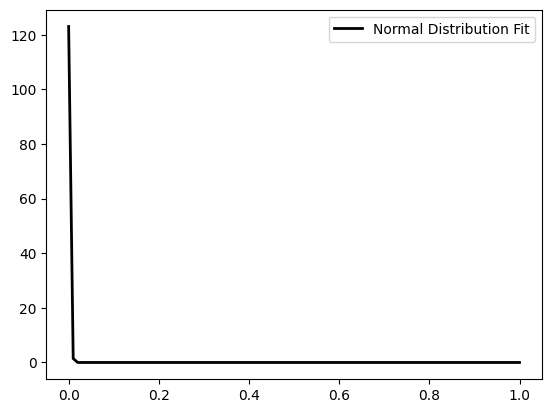

In [16]:
mu, std = norm.fit(yearly_returns)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')


plt.legend()
plt.show()

# Задание 5.
С помощью теста хи-квадрат на нормальность проверить распределение return.

In [17]:
from scipy.stats import shapiro

In [18]:
statistic, p_value = shapiro(hist['Returns'])

alpha = 0.05
if p_value > alpha:
    print("Распределение 'Returns' выглядит как нормальное (не отвергаем нулевую гипотезу).")
else:
    print("Распределение 'Returns' не является нормальным (отвергаем нулевую гипотезу).")


Распределение 'Returns' не является нормальным (отвергаем нулевую гипотезу).


/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Задание 6.
Построить q-qPlot для какого-то стока и выбранного распределения. С помощью qqPlot визуально проверить, похоже ли распределение return на нормальное, на распределение хи-квадрат, Стьюдента?
Проверить с помощью qqPlot может ли распределение return быть пуассоновским.

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, chi2, t, poisson

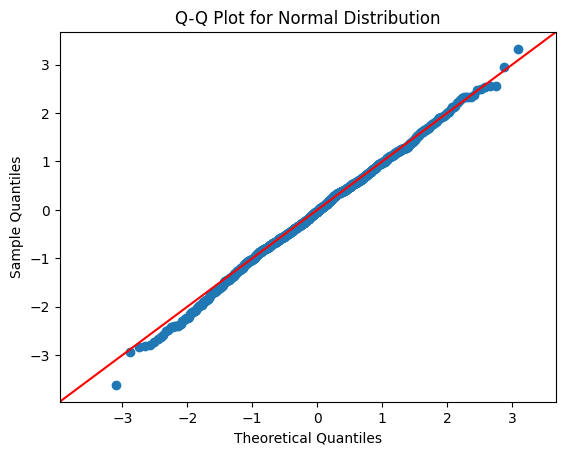

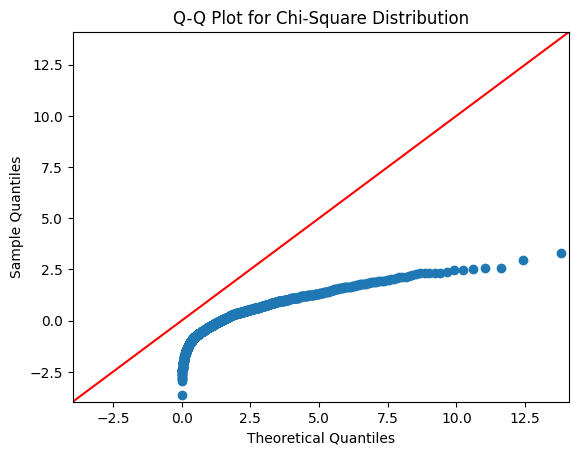

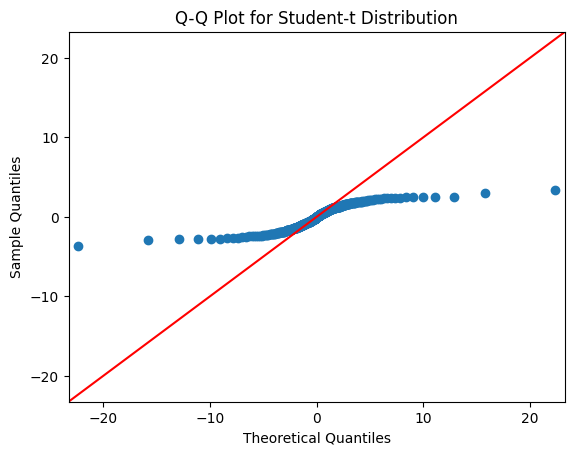

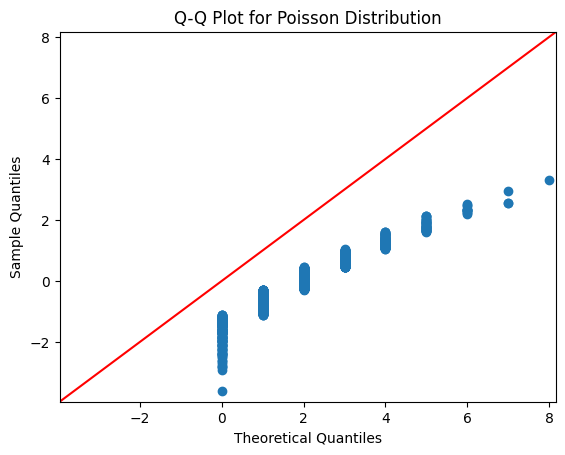

In [22]:
distributions = {
    'Normal': norm(loc=0, scale=1),
    'Chi-Square': chi2(df=2),
    'Student-t': t(df=2),
    'Poisson': poisson(mu=2)
}


for distribution_name, distribution in distributions.items():
    fig = sm.qqplot(returns, line='45', dist=distribution)
    plt.title(f'Q-Q Plot for {distribution_name} Distribution')
    plt.show()


# Задание 7.
Проверить описывается ли вектор, который состоит из длин серий, идущих подряд положительных return распределением Пуассона

In [23]:
from scipy.stats import poisson

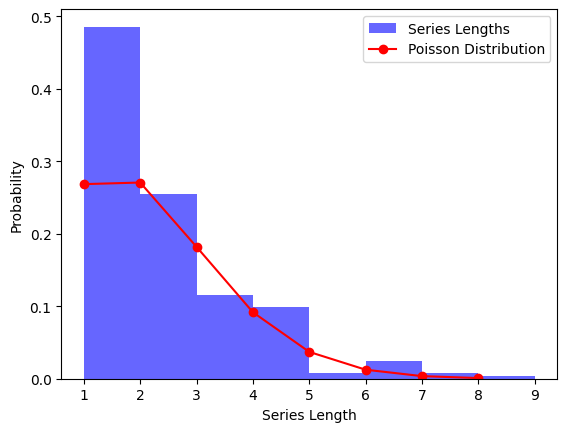

In [24]:
series_lengths = []
current_length = 0
for ret in returns:
    if ret > 0:
        current_length += 1
    else:
        if current_length > 0:
            series_lengths.append(current_length)
        current_length = 0
if current_length > 0:
    series_lengths.append(current_length)


mean_length = np.mean(series_lengths)


plt.hist(series_lengths, bins=range(1, max(series_lengths) + 2), density=True, alpha=0.6, color='b', label='Series Lengths')


x = np.arange(1, max(series_lengths) + 1)
pmf = poisson.pmf(x, mean_length)
plt.plot(x, pmf, 'r', marker='o', linestyle='-', label='Poisson Distribution')

plt.xlabel('Series Length')
plt.ylabel('Probability')
plt.legend()
plt.show()


looks kinda similar